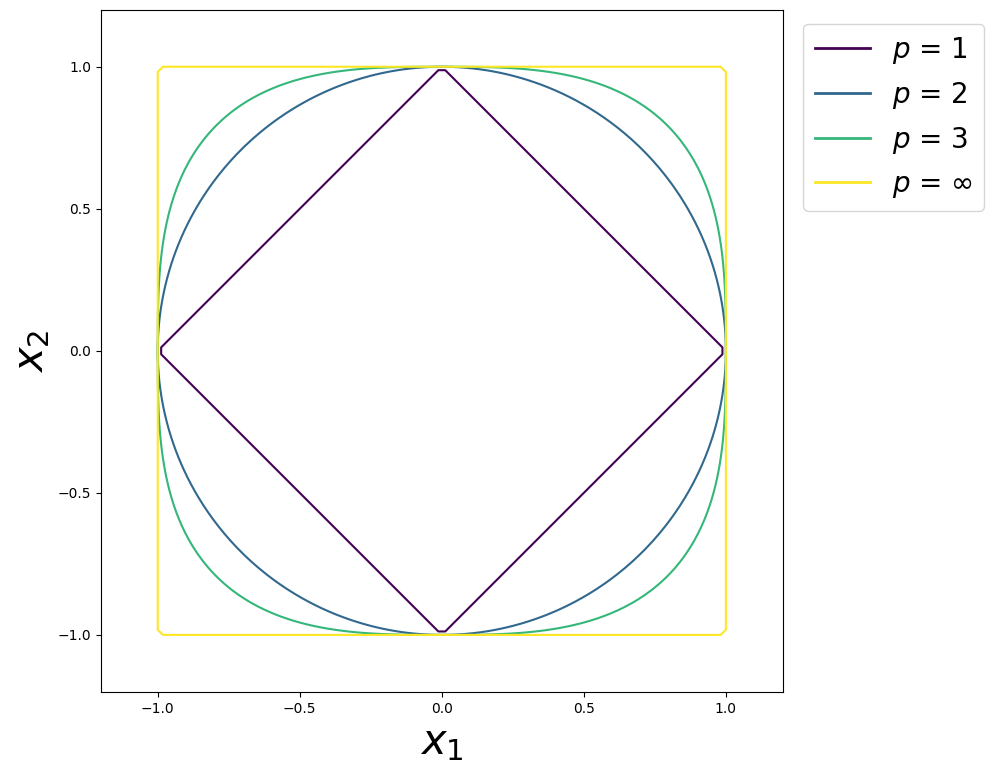

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Define the function for the p-norm contour
def p_norm_contour(p, n_points=100):
    x = np.linspace(-1.2, 1.2, n_points)
    y = np.linspace(-1.2, 1.2, n_points)
    X, Y = np.meshgrid(x, y)
    Z = (np.abs(X)**p + np.abs(Y)**p)**(1/p)
    return X, Y, Z

# Values of p to plot
p_values = [1, 2, 3, 1000]

# Plotting the contours
plt.figure(figsize=(10, 10))
colors = plt.cm.viridis(np.linspace(0, 1, len(p_values)))

# Create a list to store custom legend handles
legend_handles = []

for i, p in enumerate(p_values):
    X, Y, Z = p_norm_contour(p)
    contour = plt.contour(X, Y, Z, levels=[1], colors=[colors[i]])
    # Create a custom legend handle for each contour
    legend_handles.append(Line2D([0], [0], color=colors[i], lw=2, label='$p$ = ${}$'.format(p if p != 1000 else '\infty')))

plt.xlabel('$x_1$', fontsize=30)
plt.ylabel('$x_2$', fontsize=30)
plt.gca().set_aspect('equal', adjustable='box')

# Add the custom legend handles to the legend
plt.legend(handles=legend_handles, bbox_to_anchor=(1.01, 1), loc='upper left', fontsize=20)
plt.tight_layout()
plt.savefig('img/p_norm_contours_1.pdf')
plt.show()

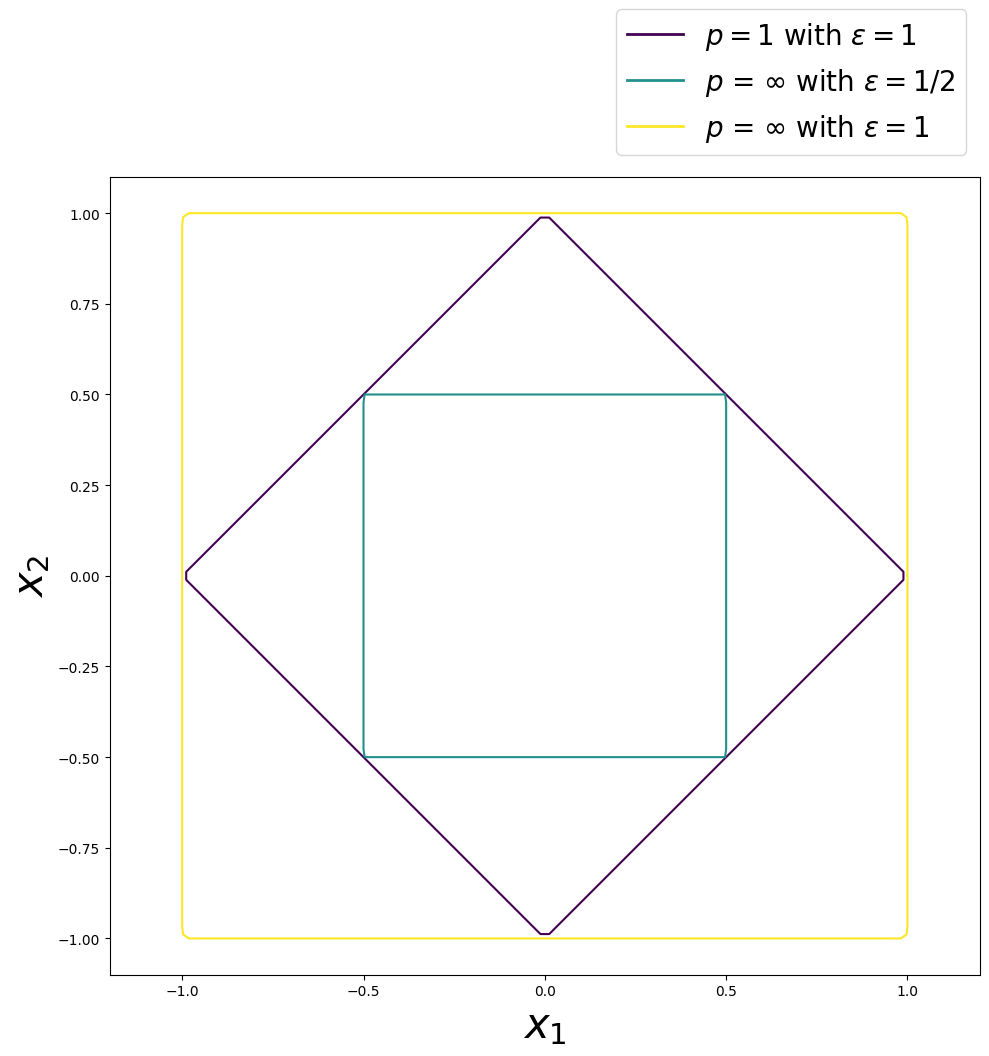

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Define the function for the p-norm contour
def p_norm_contour(p, n_points=100):
    x = np.linspace(-1.2, 1.2, n_points)
    y = np.linspace(-1.1, 1.1, n_points)
    X, Y = np.meshgrid(x, y)
    Z = (np.abs(X)**p + np.abs(Y)**p)**(1/p)
    return X, Y, Z

# Values of p to plot
p_values = [1, 1000]

# Plotting the contours
plt.figure(figsize=(10, 11))
colors = plt.cm.viridis(np.linspace(0, 1, 3))

# Create a list to store custom legend handles
legend_handles = []

for i, p in enumerate(p_values):
    X, Y, Z = p_norm_contour(p)
    if p == 1000:
        contour = plt.contour(X, Y, 2*Z, levels=[1], colors=[colors[i]])
        legend_handles.append(Line2D([0], [0], color=colors[i], lw=2, label='$p$ = ${}$ with $\\varepsilon = 1/2$'.format(p if p != 1000 else '\infty')))
        contour = plt.contour(X, Y, Z, levels=[1], colors=[colors[i+1]])
        legend_handles.append(Line2D([0], [0], color=colors[i+1], lw=2, label='$p$ = ${}$ with $\\varepsilon = 1$'.format(p if p != 1000 else '\infty')))
    else:
        contour = plt.contour(X, Y, Z, levels=[1], colors=[colors[i]])
        legend_handles.append(Line2D([0], [0], color=colors[i], lw=2, label='$p = 1$ with $\\varepsilon = 1$'))
    # Create a custom legend handle for each contour

plt.xlabel('$x_1$', fontsize=30)
plt.ylabel('$x_2$', fontsize=30)
plt.gca().set_aspect('equal', adjustable='box')

# Add the custom legend handles to the legend
plt.legend(handles=legend_handles, bbox_to_anchor=(1, 1.01), loc='lower right', fontsize=20)
plt.tight_layout()
plt.savefig('img/p_norm_contours_2.pdf')
plt.show()


/var/folders/0g/ftfzhy7s5lvfsltp1s5jhwdh0000gn/T/ipykernel_53407/1489430699.py:22: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X_, Y_, Z_, levels=[1], colors=[colors[i-1]], label='p = {}'.format(p))
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


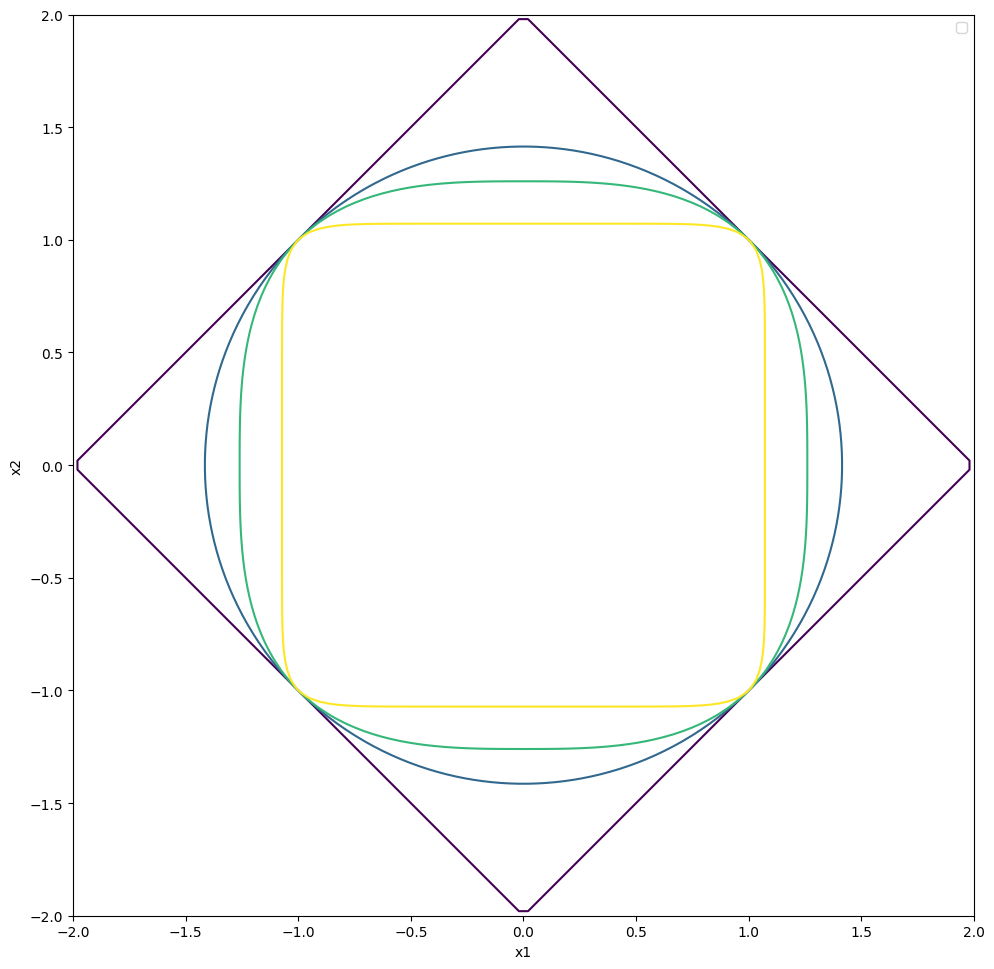

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function for the normarized p-norm contour
def normarized_p_norm_contour(p, n_points=100):
    x = np.linspace(-2, 2, n_points)
    y = np.linspace(-2, 2, n_points)
    X, Y = np.meshgrid(x, y)
    Z = ((np.abs(X)**p + np.abs(Y)**p)/2)**(1/p)
    return X, Y, Z

# Values of p to plot
p_values = [1, 2, 3, 10]

# Plotting the contours
plt.figure(figsize=(10, 10))
colors = plt.cm.viridis(np.linspace(0, 1, len(p_values)))

for i, p in enumerate(p_values, 1):
    X_, Y_, Z_ = normarized_p_norm_contour(p)
    # plt.subplot(2, 2, i)
    plt.contour(X_, Y_, Z_, levels=[1], colors=[colors[i-1]], label='p = {}'.format(p))
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.gca().set_aspect('equal', adjustable='box')

plt.legend()
plt.tight_layout()
plt.show()


In [3]:
import scipy.integrate as integrate
import numpy as np
import matplotlib.pyplot as plt

def f(e: float ,N: int, T: int, cs: np.ndarray) -> float:
    m = 2*T
    integrand = lambda ee: np.sqrt(np.sum(np.log(1 + m*np.pi*cs)) - T*np.log(ee))
    integral = integrate.quad(integrand, e, 1/2)[0]
    return 4*e + 12/np.sqrt(N) * integral

e = np.linspace(0, 0.5, 100)
N = 1000
T = np.array([1,10,100, 1000])
W = np.linspace(0.00001, 1, 100)
E = np.linspace(0, 0.49, 3)

f_list = []
for e in E:
    f_list_e = []
    for t in T:
        f_list_t = []
        for w in W:
            cs = np.random.uniform(0, w, N)
            f_list_t.append(f(e, N, t, cs))
        f_list_e.append(f_list_t)
    f_list.append(f_list_e)


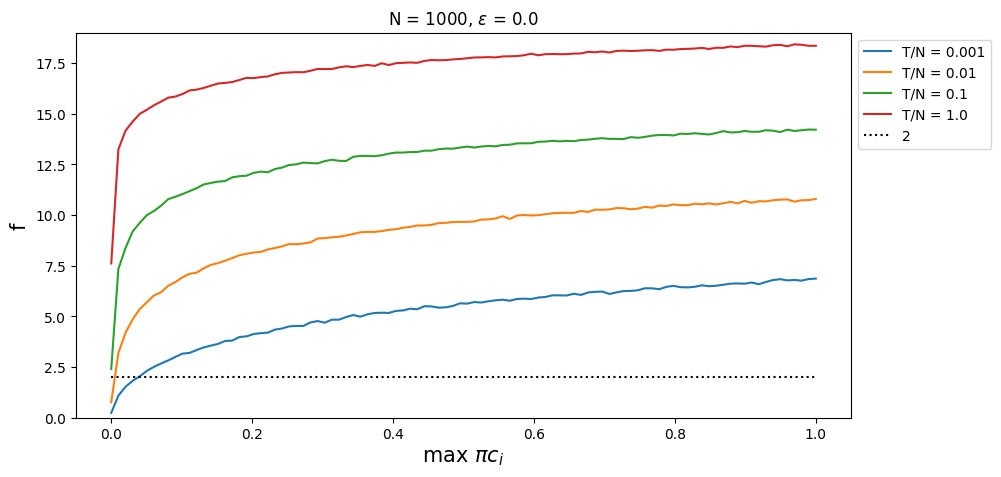

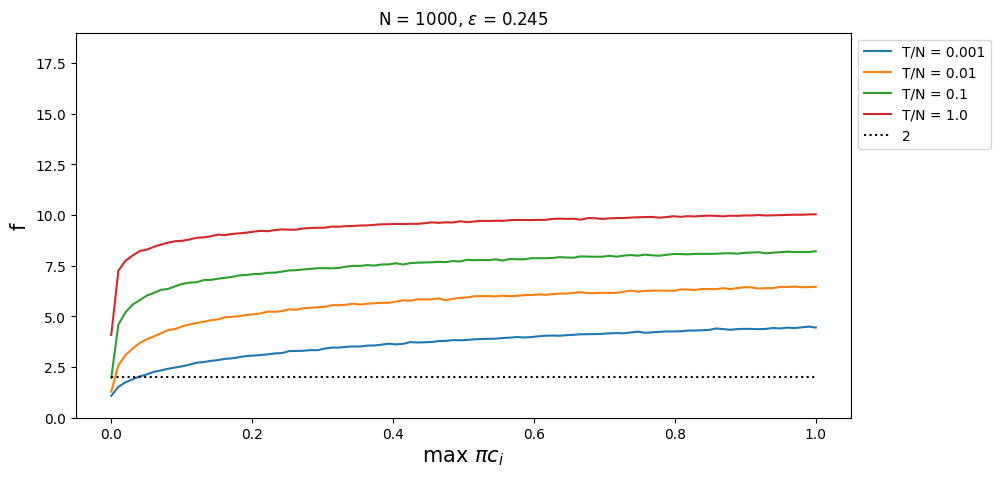

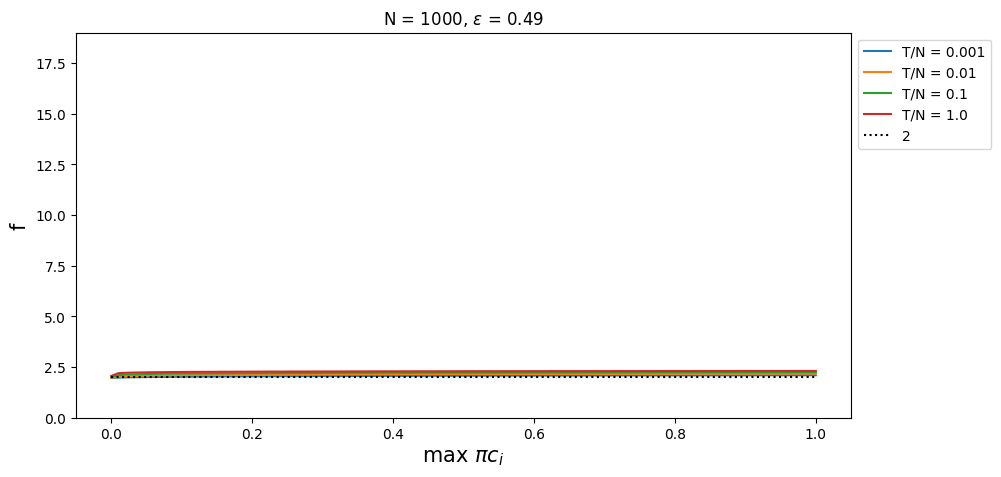

In [209]:
for ie, f_list_e in enumerate(f_list):
    plt.figure(figsize=(10, 5))
    for it, t in enumerate(T):
        plt.plot(W, f_list_e[it], label=f'T/N = {t/N}')
    plt.plot(W, 2*np.ones_like(W), label='2', linestyle='dotted', color='black')
    plt.xlabel('max $\pi c_i$', fontsize=15)
    plt.ylabel('f', fontsize=15)
    plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
    plt.title(f'N = {N}, $\\varepsilon$ = {E[ie]}')
    plt.ylim(0, 19)
    # plt.show()

In [6]:
from scipy import special
import numpy as np
import matplotlib.pyplot as plt

def erfc(x):
    return 1 - special.erf(x)

def Antiderivative(e: float, T: int, cs: np.ndarray) -> float:
    m = 2*T
    a = np.sum(np.log(1 + np.pi * m * cs))/T
    result = np.sqrt(T) * (
        e*np.sqrt(a - np.log(e))
        + np.sqrt(np.pi)/2 * np.exp(a) * erfc(np.sqrt(a - np.log(e)))
    )
    return result

def f_exact(N: int, T: int, cs: np.ndarray) -> float:
    m = 2*T
    a = np.sum(np.log(1 + np.pi * m * cs))/T
    e = np.exp(a - N/9/T) if np.exp(a - N/9/T) <= 0.5 else 0.5
    integral = Antiderivative(1/2, T, cs) - Antiderivative(e, T, cs)
    return 4*e + 12/np.sqrt(N) * integral

e = np.linspace(0, 0.5, 100)
N = 1000
T = np.array([1,10,100,250,500,750,1000])
W = np.linspace(0.00001, 1, 100)

f_list = []
for t in T:
    f_list_t = []
    for w in W:
        cs = np.random.uniform(0, w, t)
        f_list_t.append(f_exact(N, t, cs))
    f_list.append(f_list_t)

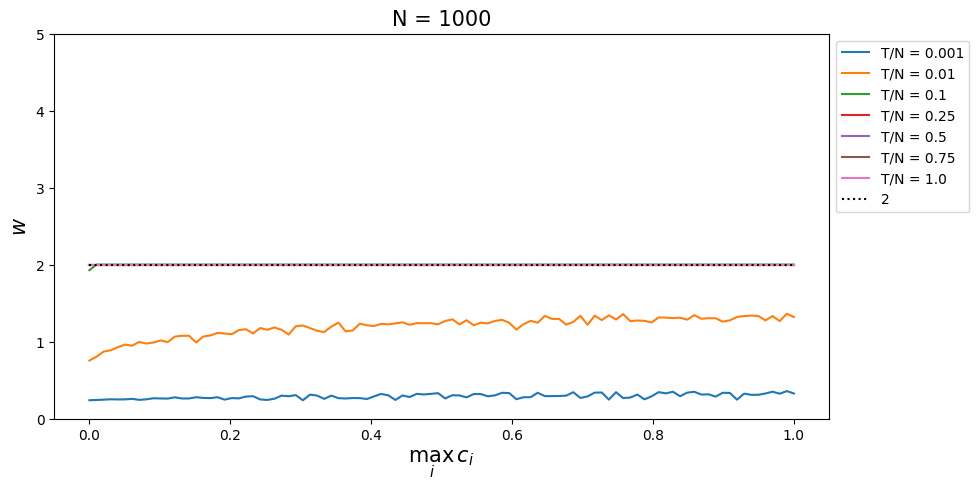

In [12]:
plt.figure(figsize=(10, 5))
for it, t in enumerate(T):
    plt.plot(W, f_list[it], label=f'T/N = {t/N}')
plt.plot(W, 2*np.ones_like(W), label='2', linestyle='dotted', color='black')
plt.xlabel('$\max_i\,c_i$', fontsize=15)
plt.ylabel('$w$', fontsize=15)
plt.ylim(0, 5)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.title(f'N = {N}', fontsize=15)
plt.savefig('img/upper-bound_interval.pdf', bbox_inches='tight')
plt.show()

## The above implies that the upper bound of the generalization error is almost consttant when $c_i$ is large and 0.5? < T/N

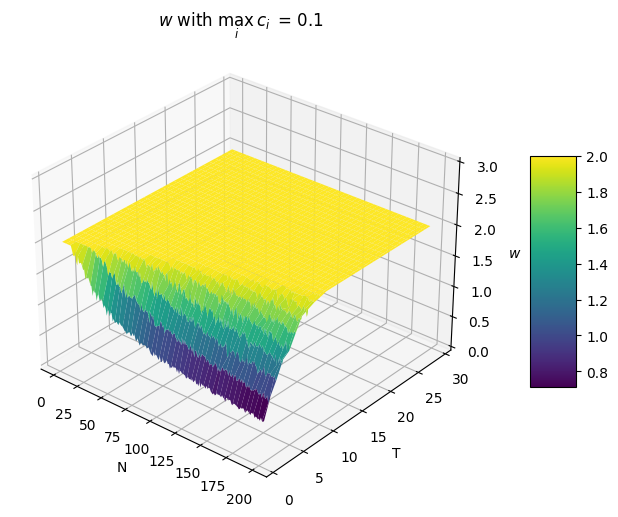

In [16]:
from matplotlib import cm
from scipy import special
import scipy.integrate as integrate

def erfc(x):
    return 1 - special.erf(x)

def Antiderivative(e: float, T: int, cs: np.ndarray) -> float:
    m = 2*T
    a = np.sum(np.log(1 + np.pi * m * cs))/T
    result = np.sqrt(T) * (
        e*np.sqrt(a - np.log(e))
        + np.sqrt(np.pi)/2 * np.exp(a) * erfc(np.sqrt(a - np.log(e)))
    )
    return result

def f_(N: int, T: int) -> float:
    m = 2*T
    cs = np.random.uniform(0, 0.1, T)
    a = np.sum(np.log(1 + np.pi * m * cs))/T
    e = np.exp(a - N/9/T) if np.exp(a - N/9/T) <= 0.5 else 0.5
    # e = np.exp(a - N/9/T)
    integral = Antiderivative(1/2, T, cs) - Antiderivative(e, T, cs)
    return 4*e + 12/np.sqrt(N) * integral

N = np.arange(1, 200)
T = np.arange(1, 30)

X, Y = np.meshgrid(N, T)
Z = np.array([[f_(n, t) for n in N] for t in T])

# 3D
fig = plt.figure(figsize=(15, 6))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap=cm.viridis)
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
angle = -50
ax.view_init(30, angle)

ax.set_xlabel('N')
ax.set_ylabel('T')
ax.set_zlim(0, 3)
ax.set_zlabel('$w$')
plt.title('$w$ with $\max_i\,c_i$ = 0.1')
plt.savefig('img/upper-bound_01.pdf')
plt.show()

In [ ]:
# I plotted the analytical results, but the bound seems a bit loose. How tight does it need to be to be useful?

The distribution of $$ \operatorname{Tr}\sqrt{\sum_{i=1}^N \rho_i^2} $$ when $\rho_i$ is a random density matrix is plotted below.

In [98]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import sqrtm
from qiskit import QuantumCircuit
import qiskit.quantum_info as qi


class GenerateCircuit:
    def __init__(self, nqubits: int, nlayers: int):
        self.nqubits = nqubits
        self.nlayers = nlayers

    def HEA(self, circuit: QuantumCircuit, params: np.ndarray) -> None:
        for i in range(self.nqubits):
            circuit.rx(params[i], i)
            circuit.ry(params[i + self.nqubits], i)
        for i in range(self.nqubits - 1):
            circuit.cx(i, i + 1)
        circuit.barrier()

    def generate_circuit(self, params: np.ndarray) -> QuantumCircuit:
        self.circuit = QuantumCircuit(self.nqubits)
        for i in range(self.nlayers):
            self.HEA(self.circuit, params[2 * self.nqubits * i : 2 * self.nqubits * (i + 1)])
        
        return self.circuit


class TS(GenerateCircuit):
    def __init__(self, nqubits: int, nlayers: int, nsamples: int):
        super().__init__(nqubits, nlayers)
        self.nsamples = nsamples

    def generate_circuit_state(self, params: np.ndarray) -> qi.DensityMatrix:
        circuit = self.generate_circuit(params)
        rho = qi.DensityMatrix.from_instruction(circuit)
        return rho

    def make_random_params(self) -> np.ndarray:
        params = np.random.uniform(0, 2 * np.pi, 2 * self.nqubits * self.nlayers)
        return params

    def generate_circuit_rho(self) -> np.ndarray:
        rho = self.generate_circuit_state(self.make_random_params()).to_operator().data
        return rho

    def result(self) -> float:
        train_samples = []
        for _ in range(self.nsamples):
            train_samples.append(self.generate_circuit_rho())
        
        train_samples = np.array(train_samples)
        
        result = np.trace(sqrtm(np.sum(train_samples, axis=0)))
        return np.abs(result)

In [99]:
nquibits = 1
dimension = 2**nquibits
nlayers = 2
datasetsize = 50
nsamples = 100
samples = []

upper_bound = dimension * datasetsize

for _ in range(nsamples):
    ts = TS(nquibits, nlayers, datasetsize)
    samples.append(ts.result())

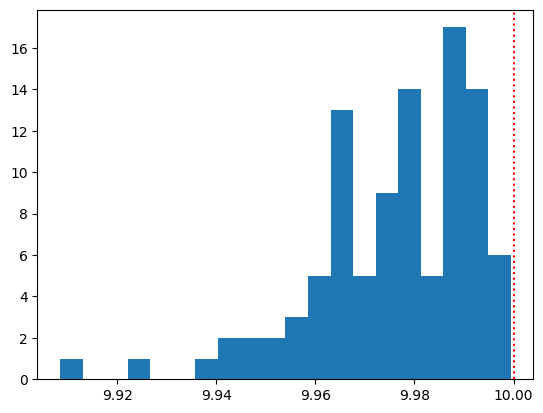

In [100]:
plt.hist(samples, bins=20)
plt.axvline(np.sqrt(upper_bound), color='red', linestyle='dotted')